In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
app_df = pd.read_csv("application_data.csv")

In [3]:
print(app_df.shape)

(307511, 122)


In [4]:
#missing data 
missing_fractions = app_df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
dtype: float64

# 1.Drop features 

# Limit the Feature Space
The full dataset has 122 features for each loan. We'll select features in two steps:

1. Drop features with more than 30% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Text(0, 0.5, 'Feature count')

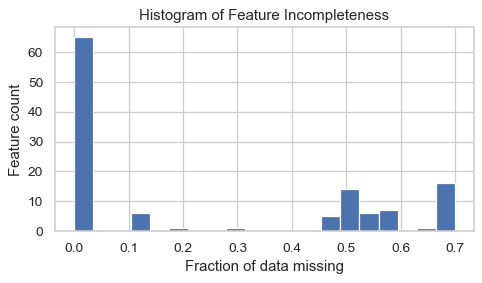

In [6]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [7]:
app_df['TARGET'].value_counts(dropna=False)

0    282686
1     24825
Name: TARGET, dtype: int64

# 1.1 Drop features missing more than 30% percent data

In [8]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)
print("\n\n Drop Features: ", len(drop_list))

['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'EXT_SOURCE_1', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'OCCUPATION_TYPE', 'OWN_CAR_AGE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI'

In [9]:
app_df.drop(labels=drop_list, axis=1, inplace=True)

In [10]:
app_df.shape

(307511, 72)

In [11]:
print(app_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

# Columns of choice

In [12]:
#useless columns:
["SK_ID_CURR"]

['SK_ID_CURR']

In [13]:
app_df.drop(labels=["SK_ID_CURR"], axis=1, inplace=True)

In [14]:
# Behavior of the applicant before the loan application
Behavior=['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
          'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
#Different Behavior variables
Behavior_2=['DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION','WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START']

In [16]:
# indicator (dummy variable) whether the applicant provided ...
Flag=['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [17]:
# does not match variable (fraud?)
notmatch=['REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY']

In [18]:
#alarming columns ,past default record
Default_record=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# use .drop() to drop the columns you don't want

In [19]:
#column that doesn't contain object input
value_column=[]
for i in range(app_df.shape[1]):
    if type(app_df.iloc[1,i])!=str:
        value_column.append(i)

In [20]:
#app_df.loc[:,app_df.columns[value_column]].describe().transpose()

# Pearson correlation matrix
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

In [21]:
# We may drop Flag variables
app_df_2=app_df.drop(labels=Flag, axis=1)


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

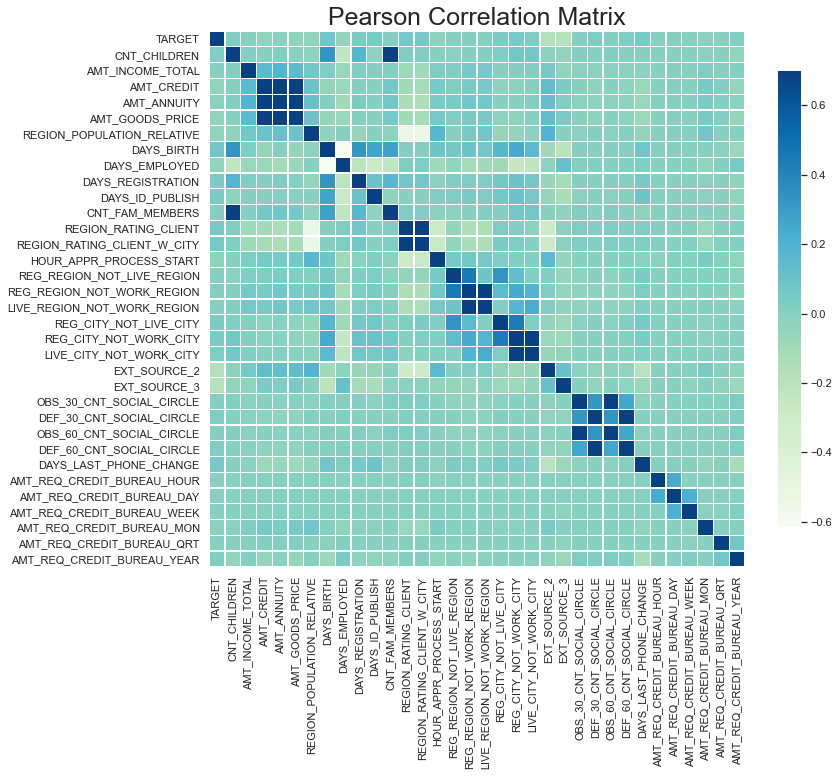

In [22]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(app_df_2.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=False, cbar_kws={"shrink": .7})

# high correlation between AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

# high correlation between Default_record variables

In [23]:
for i in range(app_df.loc[:,Flag].shape[1]):
    print(app_df.loc[:,Flag].iloc[:,i].value_counts(dropna=False))
    print("\n\n")

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64



1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64



0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64



1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64



0    221080
1     86431
Name: FLAG_PHONE, dtype: int64



0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64



0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64



1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64



0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64



0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64



0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64



0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64



0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64



0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64



0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64



0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64



0    

<AxesSubplot:title={'center':'Pearson Correlation Matrix within Flag variable'}>

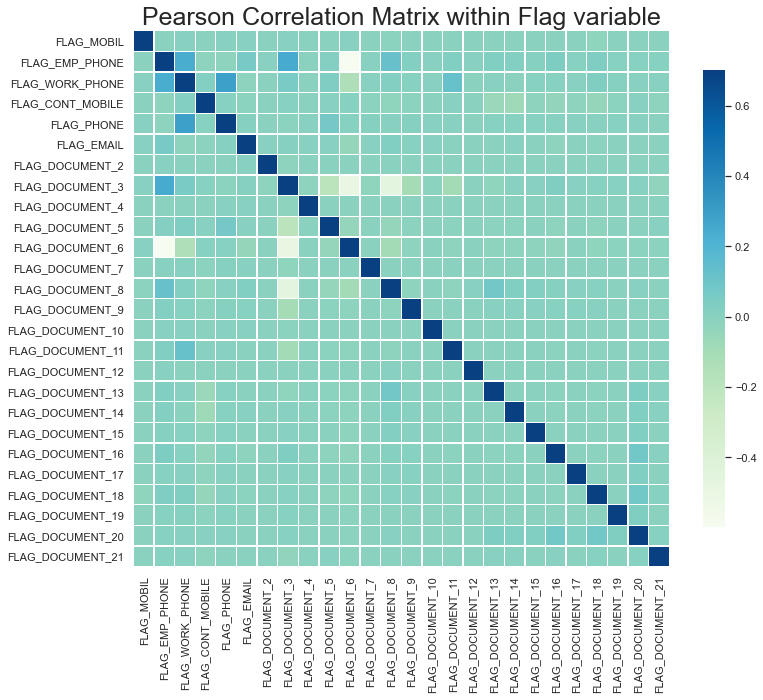

In [24]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix within Flag variable',fontsize=25)
sns.heatmap(app_df.loc[:,Flag].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=False, cbar_kws={"shrink": .7})

# 1.2 one-hot encoding
# app_df=pd.get_dummies(app_df)

# 1.3 scaler
from sklearn.preprocessing import MinMaxScaler

X = X.drop(columns = ['TARGET'])

saved_cols = app_df.columns

scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns = saved_cols)




# 2. Multicollinearity
Although highly correlated features (multicollinearity) aren't a problem for the machine learning models based on decision trees (as used here), these features decrease importances of each other and can make feature analysis more difficult. Therefore, I calculate feature correlations and remove the features with very high correlation coefficients before applying machine learning.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
#column that doesn't contain object input
value_column=[]
for i in range(app_df.shape[1]):
    if type(app_df.iloc[1,i])!=str:
        value_column.append(i)

In [27]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X=app_df.iloc[:,value_column].drop(labels=['TARGET'],axis=1)
X=X.dropna()

In [28]:
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Yash Sharma\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
10,FLAG_MOBIL,15887.14
11,FLAG_EMP_PHONE,2228.79
7,DAYS_EMPLOYED,2210.46
30,OBS_60_CNT_SOCIAL_CIRCLE,341.82
28,OBS_30_CNT_SOCIAL_CIRCLE,341.31
4,AMT_GOODS_PRICE,42.65
2,AMT_CREDIT,41.78
17,REGION_RATING_CLIENT,11.22
18,REGION_RATING_CLIENT_W_CITY,11.06
21,REG_REGION_NOT_WORK_REGION,9.20


# Note : there is a threshold for VIF in performing linear models!

# VIF Doesn't work for whole dataset(with object variables) after one-hot.
# divde by 0 error

In [29]:
c=app_df.corr().unstack()
c.sort_values(ascending=False).drop_duplicates().head(10)

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998490
AMT_CREDIT                   AMT_GOODS_PRICE                0.986968
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879161
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860627
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860517
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
AMT_ANNUITY                  AMT_GOODS_PRICE                0.775109
AMT_CREDIT                   AMT_ANNUITY                    0.770138
dtype: float64

In [30]:
c.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_2                REGION_RATING_CLIENT          -0.292895
DAYS_BIRTH                  FLAG_DOCUMENT_6               -0.407160
FLAG_DOCUMENT_3             FLAG_DOCUMENT_8               -0.465730
FLAG_DOCUMENT_6             FLAG_DOCUMENT_3               -0.486238
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY   -0.531535
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE    -0.532877
FLAG_EMP_PHONE              FLAG_DOCUMENT_6               -0.597732
DAYS_BIRTH                  DAYS_EMPLOYED                 -0.615864
DAYS_EMPLOYED               FLAG_EMP_PHONE                -0.999755
FLAG_MOBIL                  EXT_SOURCE_2                        NaN
dtype: float64

# Selecting 10 best features

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
temp=app_df.dropna()
X = temp.iloc[:,value_column].drop(['TARGET'],axis = 1)
target = temp['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size= 0.3, random_state = 0,stratify=target)

In [33]:
# X = X.interpolate(method ='linear', limit_direction ='forward')
# interpolate is for missing data 

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,target,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

# Note: You may use one-hot for object variable
just search one-hot in kaggle
# Note: cross-validation
# Note: Some models need Normalizing / scaling the data, others don't

# Data Imbalance-Over Sampling/ Under Sampling

<a id = "Imbalance"></a>
<div align='left'><font size="5" color="#A52A2A"> Data Imbalance-Over Sampling</font></div>
<hr>

[Go back to the Table of Contents](#table_of_contents)  
<hr>

<div align='left'><font size="3" color="#000000"> One of the common issues found in datasets that are used for classification is imbalanced classes issue. Imbalanced data typically refers to a classification problem where the number of observations per class is not equally distributed. It usually reflects an unequal distribution of classes within a dataset.</font></div>   
> <img style="float: centre;" src="https://miro.medium.com/max/364/1*QoW_njAnS3D0QWve7NNB8w.png" width="350px"/>
<div align='left'><font size="3" color="#000000"> If there are two classes, then balanced data would mean 50% points for each of the class.In our case 50:1 ratio between the fraud and non-fraud classes which is highly imbalance. There are 3 major techniques are there to eliminate the imbalance problem. 
</font></div>  
<hr>
<div align='left'><font size="3" color="#000000">1.Random Over Sampling</font></div>   
<div align='left'><font size="3" color="#000000"> 2.Random Under Sampling</font></div>   
<div align='left'><font size="3" color="#000000">3.SMOTE(Synthetic Minority Over-sampling Technique).</font></div>   
<hr>
<div align='left'><font size="3" color="#000000"> Since under sampling may discard the useful information which could be important for building good classifiers, we choose random over sampling and SMOTE (Synthetic Minority Oversampling Technique). Random over sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. Implementing Random over sampling on this  dataset helps to the balance the labels (more no fraud than fraud transactions).</font></div> 


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

<div align='left'><font size="3" color="#000000"> SMOTE is a technique that generates new observations by interpolating between observations in the original dataset.Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).</font></div> 

In [ ]:
print('before SMOTE:',Counter(Y_train))
sm = SMOTE(sampling_strategy='minority')
X_train2, Y_train2 = sm.fit_resample(X_train, Y_train)
print('After SMOTE:',Counter(Y_train2))

In [ ]:
print(Counter(target))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After SMOTE', fontsize = 20)
sns.set_palette("bright")
sns.countplot(Y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(Y_train2, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

<div align='left'><font size="3" color="#000000">
Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any increase in the variety of training examples.

Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same class) near each other, it creates a third artificial one, bang in the middle of the original two.

SMOTE, when done right, is preferable over plain old random oversampling. One, however, has to be careful about the newly created examples and must make sure that they are ‘legal’. For example, for an input for which legal values are a table and chair, there is no legal in-between value. This, off course, does not apply to, for instance, an input representing the weight of an item.
    </font></div> 

# roc_auc_score!

# haven't addressed outliers

# example of using SMOTE on logistic regression

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, target):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index,:], X.iloc[test_index,:]
    original_ytrain, original_ytest = target.iloc[train_index], target.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression(solver='liblinear')

log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)